In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

In [2]:
# get a list of all folders
filepath = "SensorLogger/"
dir_list = os.listdir(filepath)
dir_list

['2022-11-14_14-07-05', '2022-11-15_19-43-07', '2022-11-16_20-24-32']

In [3]:
n = 0
#read csv file for 2 sensors
path_acce = filepath + "/"+ dir_list[n] + "/"+ "Accelerometer.csv"
path_gyro = filepath + "/"+ dir_list[n] + "/"+"Gyroscope.csv"
df1 = pd.read_csv(path_acce)
print(df1.shape)
df2 = pd.read_csv(path_gyro)
print(df2.shape)
#rename col
df1.rename(columns={"x": "Accel_x", "y": "Accel_y","z":"Accel_z"}, inplace=True)
df2.rename(columns={"x": "Gyros_x", "y": "Gyros_y","z":"Gyros_z"}, inplace=True)
df1 = df1[['time', 'seconds_elapsed', 'Accel_x','Accel_y','Accel_z']]
df2 = df2[['time', 'seconds_elapsed', 'Gyros_x','Gyros_y','Gyros_z']]
df = pd.merge(df1, df2, on=["time","seconds_elapsed"])
df = df.drop(["time"], axis=1)
#df["seconds_elapsed"] = df["seconds_elapsed"]*1000
df.rename(columns={"seconds_elapsed": "t0"}, inplace=True)
print(df.shape)
df

(1178953, 5)
(1178953, 5)
(1173652, 7)


,t0,Accel_x,Accel_y,Accel_z,Gyros_x,Gyros_y,Gyros_z
0,4.848814,-0.454133,1.593017,1.209406,-0.169821,-0.894918,0.432493
1,4.858813,-0.830567,0.343177,0.572071,-0.267559,-1.078788,0.502131
2,4.868812,-0.528987,0.028822,0.811304,-0.280998,-1.243111,0.515570
3,4.878810,-1.320833,-0.363300,0.839429,-0.170431,-1.339017,0.529009
4,4.888808,-0.218014,-0.159368,2.228629,0.042150,-1.431868,0.527177
...,...,...,...,...,...,...,...
1173647,11795.702259,0.036391,0.374606,-0.374187,0.160299,0.497015,0.049126
1173648,11795.712257,0.043420,0.167250,-0.032046,0.134643,0.445703,0.043017
1173649,11795.722255,0.024379,0.091265,0.100471,0.111430,0.310090,0.022859
1173650,11795.732252,0.007908,0.153346,0.049473,0.100434,0.181198,0.003922


In [4]:
# load bike label
label = pd.read_csv("BikeLabels.csv")
label = label[label['video']=="11-14-22"]

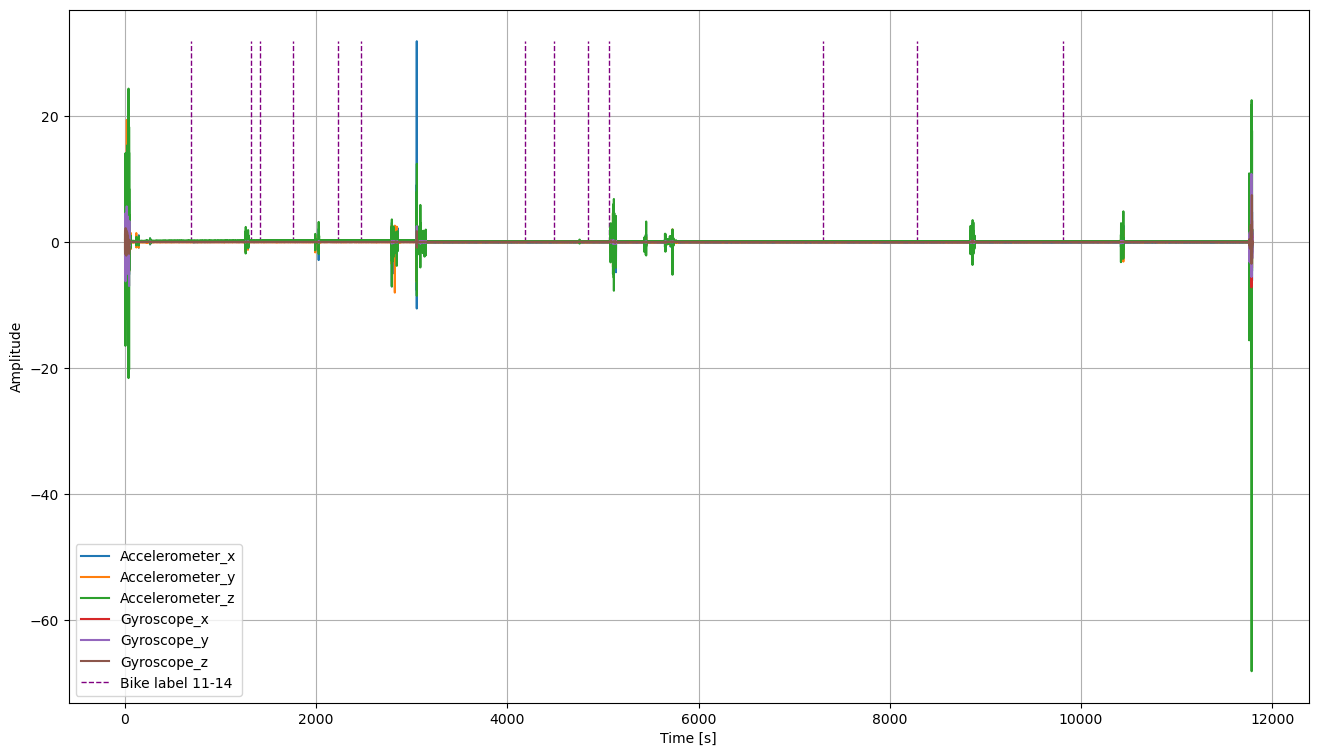

In [5]:
# look at sensor
length = np.max(df['t0'])-np.min(df['t0'])

time = np.linspace(0., length, df.shape[0])
fig = plt.gcf()
fig.set_size_inches(16, 9)

plt.plot(time, df["Accel_x"], label="Accelerometer_x")
plt.plot(time, df["Accel_y"], label="Accelerometer_y")
plt.plot(time, df["Accel_z"], label="Accelerometer_z")
plt.plot(time, df["Gyros_x"], label="Gyroscope_x")
plt.plot(time, df["Gyros_y"], label="Gyroscope_y")
plt.plot(time, df["Gyros_z"], label="Gyroscope_z")

#draw vertical lines
plt.vlines(x=label['s_video'], ymin=0, ymax=max(df["Accel_x"]), colors='purple', ls='--', lw=1, label='Bike label 11-14')

plt.legend()
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [6]:
# load time shifting
shifting = pd.read_csv("time_shift.csv")
shifting = shifting[shifting['video']=="11-14-22"]
label['s_video'] = label['s_video'] + shifting.at[0,"s_to_senser_from_v"]

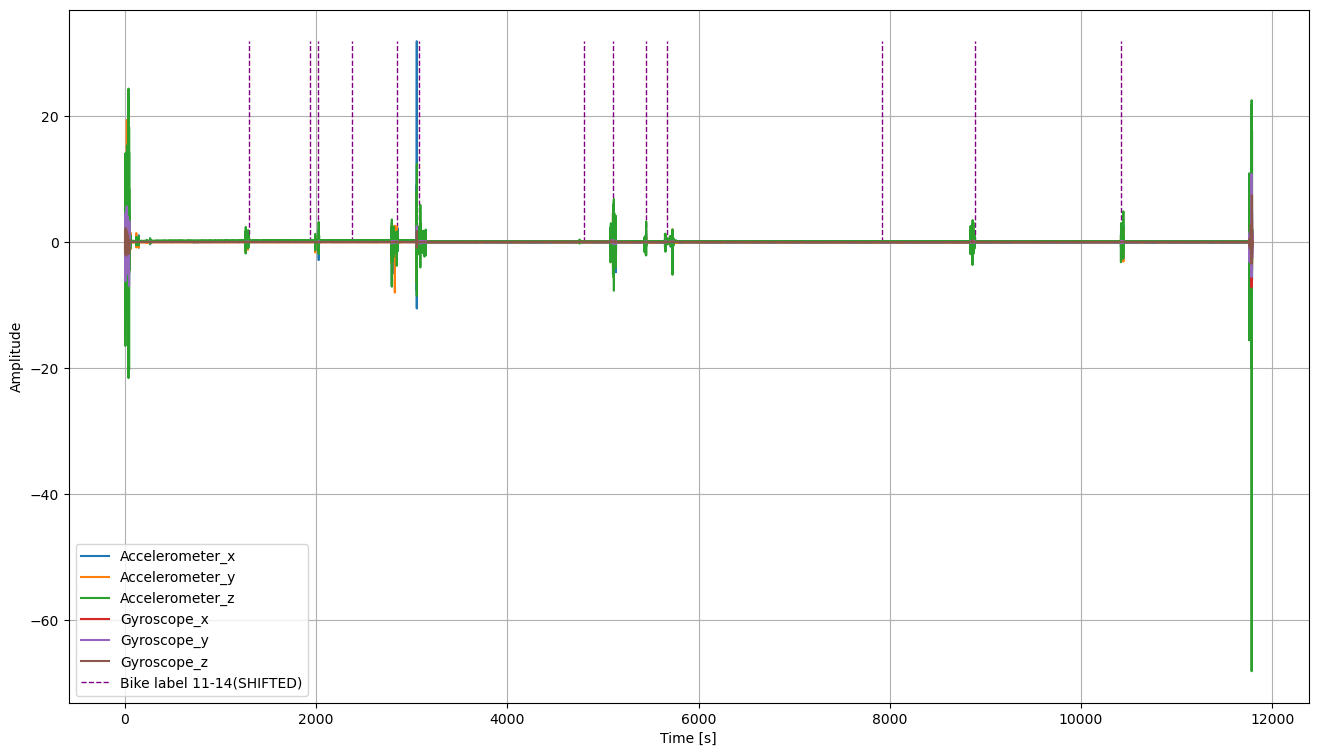

In [7]:
# look at sensor
length = np.max(df['t0'])-np.min(df['t0'])

time = np.linspace(0., length, df.shape[0])
fig = plt.gcf()
fig.set_size_inches(16, 9)

plt.plot(time, df["Accel_x"], label="Accelerometer_x")
plt.plot(time, df["Accel_y"], label="Accelerometer_y")
plt.plot(time, df["Accel_z"], label="Accelerometer_z")
plt.plot(time, df["Gyros_x"], label="Gyroscope_x")
plt.plot(time, df["Gyros_y"], label="Gyroscope_y")
plt.plot(time, df["Gyros_z"], label="Gyroscope_z")

#draw vertical lines
plt.vlines(x=label['s_video'], ymin=0, ymax=max(df["Accel_x"]), colors='purple', ls='--', lw=1, label='Bike label 11-14(SHIFTED)')

plt.legend()
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [8]:
path_micr = filepath + "/"+ dir_list[n] + "/"+"Microphone.wav" # convert mp4 to wav
samplerate,data = wavfile.read(path_micr)

In [9]:
data.shape,samplerate

((94366080,), 8000)

In [16]:
length = data.shape[0] / samplerate
print(f"length = {length}s")

length = 11795.76s


ValueError: x and y must have same first dimension, but have shapes (1173652,) and (94366080,)

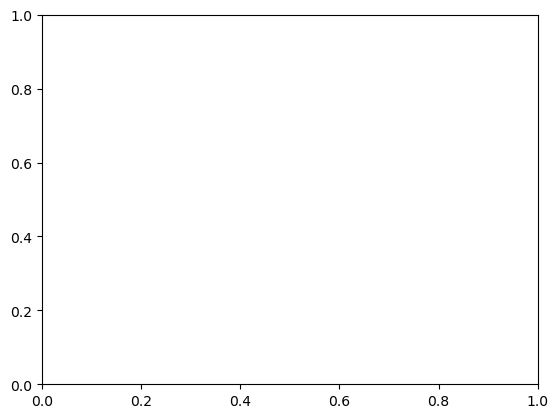

In [17]:
plt.plot(time, data)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()